In [23]:
#objectives
# 1. Load and preprocess the dataset
# 2. Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to find patterns and relationships
# 4. Visualize the data to understand trends and distributions
# 5. Evaluate the model performance using appropriate metrics
# 6. Identify patterns and correlations in EUR/USD exchange rates movements
# 7. Save the cleaned and processed data for future use


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [25]:
#loadiing the dataset to perform initial inspection

df = pd.read_csv('climate_action_data.csv')

df.head()



,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [26]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [27]:
#descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [28]:
df.shape

(913, 10)

In [29]:
#Handling bad data
#working on empty values
#checking for Empty values or null values
print ('Missing values per column:')
df.isnull().sum()

Missing values per column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [32]:
#Handling missing values
#for numerical columns ,we fill missing values with mean or median
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col]= pd.to_numeric(df[col], errors='coerce')#coercing errors to Nan
        #filling Nan to numeric with median
        df[col]= df[col].fillna(df[col].median())
        
#categorial data we can use mode to fill its values
categorical_cols = ['Crop_Type'] 
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
#Checking again for missing values
print ('missing values after handling:')
df.isnull().sum()              

missing values after handling:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [33]:
#Date in wrong format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#Handle soil_moisture column with error value
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors = 'coerce')
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

#Handle soil_ph column with error value
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors = 'coerce')
df['Soil_pH']= df['Soil_pH'].fillna(df['Soil_pH'].median())

#Handle soil_moisture column with error value
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors = 'coerce')
df['Temperature(C)']=df['Temperature(C)'].fillna(df['Temperature(C)'].median())

#Handle soil_moisture column with error value
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors = 'coerce')
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].median())

#Handle soil_moisture column with error value
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors = 'coerce')
df['Fertilizer_Recommended(kg/ha)']=df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

#Handle soil_moisture column with error value
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors = 'coerce')
df['Irrigation_Recommended(mm)']= df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

In [34]:
#Wrong data
factor_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in factor_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
        df[col] = df[col].fillna(df[col].median())

In [35]:
#check for duplicates
print('duplicate columns:')
df.duplicated().sum()

duplicate columns:


111

In [36]:
#remove duplicates
df = df.drop_duplicates()
print("number of rows after droping duplicates: ",df.shape)

#duplicate dates
print('duplicate dates:',df['Date'].duplicated().sum())

#remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep = 'first')

df.shape

number of rows after droping duplicates:  (802, 10)
duplicate dates: 3


(799, 10)

In [38]:
#final clean dataset
df.info()

print('missing values after cleaning')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
missing values after cle

Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

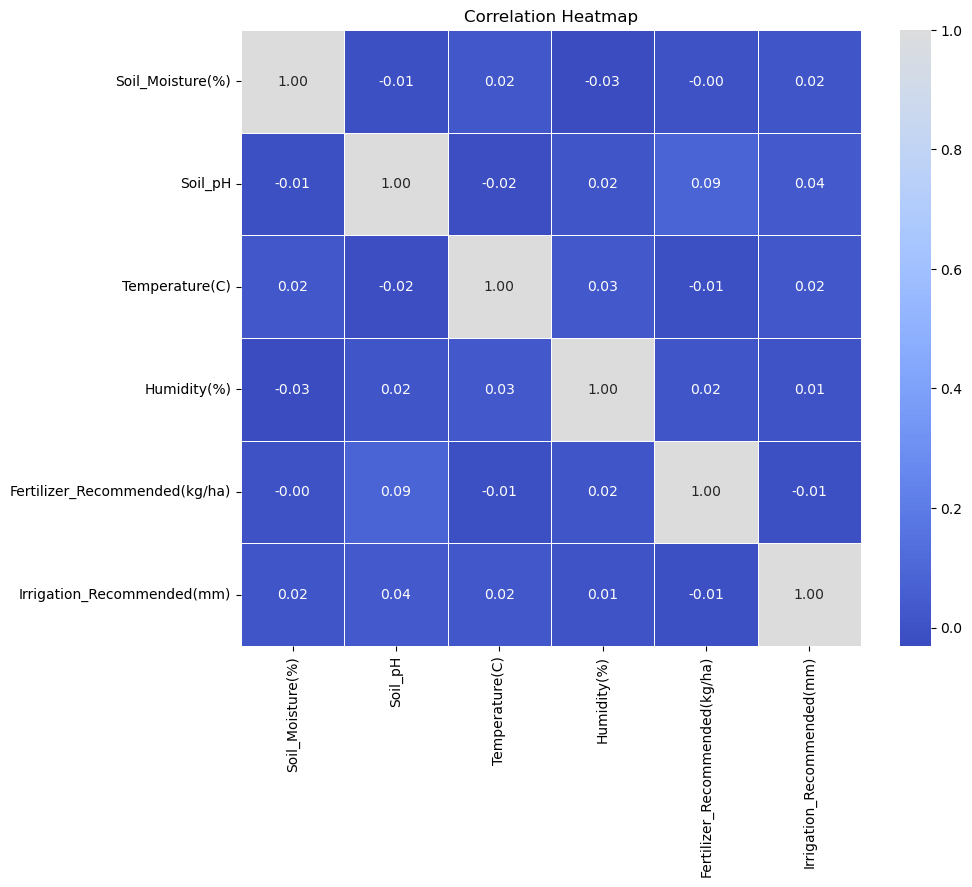

In [45]:
#Analysis
#calculating correlation matrix

corr_matrix = df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()

#plotting correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()